파이썬 머신러닝 완벽가이드 ch2. 5~ 7 pg. 116~144

### **[개념 정리]**
---

### **05. 데이터 전처리**
Garbige In, Garbage Out! 입력 데이터가 중요하다.
- 결손값(NaN, Null) 처리: 대체 혹은 드롭
- 문자열 처리: 숫자형으로 변환/벡터화, 식별자 피처는 삭제
- sklearn.preprocessing

(1) 데이터 인코딩
1. 레이블 인코딩: 카테고리 피처(문자)->코드형 숫자값(카테고리 숫자)
 - LabelEncoder() 객체 생성, fit(), transform()
 - .classes_ : 인코딩 값 순서 확인
 - .inverse_transform([인코딩 값]): 다시 원본으로 디코딩
 - 숫자형으로 인한 가중치 부여로 오류 생길 수 있음. ML 알고리즘에 적용 X( 단, 트리계열 ML은 숫자 특정 반영하지 않으므로 사용가능)

2. 원-핫 인코딩: 새로운 피처 추가, 고유값=1, 나머지=0
 - 행 형태의 고유값을 열 형태로 차원 변화, 0,1 표시
 - OneHotEncoder() 객체, fit(), transform()
 - 입력값은 2차원 데이터, 원핫인코딩 후 변환값이 희소 행렬이므로 toarray()로 밀집행렬 변환 필요
 - pandas의 get_dummies(): df 바로 변환 가능! 편리하다*


(2) 피처 스케일링과 정규화

- 피처 스케일링: 서로 다른 변수의 값 범위를 일정한 수준으로 맞춤
1. 표준화(StandardScaler): 평균0, 분산1인 가우시안 정규분포를 가진 값으로 피처들 변환.
 ```
  (x-mean(x))/sd(x)
```
2. 정규화(MinMaxScaler): 개별 변수들의 크기 단위를 동일하게 함. 최소0 ~ 최대1
```
(x-min(x)) / (max(x)-min(x))
```
- 벡터 정규화(Normalizer): 선형대수 개념의 정규화. 개별 벡터를 모든 벡터의 크기로 나눔

(3) StandardScaler
- 개별 피처를 가우시안정규분포 값으로 변환~N(0,1)
- 서포트 벡터 머신, 선형회귀, 로지스틱 회귀에서 중요하게 사용
- StandardScaler() 객체 생성, fit(), transform()
- ndarray로 반환됨(DF로 변환 필요)

(4) MinMaxScaler
- 0 ~ 1 사이의 범위로 맞추기 (음수 있으면 -1~ 1)
- MinMaxScaler() 객체 생성, fit(), transform()
- ndarray로 반환

(5) 학습 데이터와 테스트 데이터의 스케일링 변환 시 유의점
- fit(): 데이터 변환을 위한 기준 정보 설정/ transform(): 데이터 변환
- fit_transform(): 한번에 적용
- 주의!!
 - 테스트 데이터는 학습 데이터 스케일링 기준에 따라야함. 동일하게 변환되어야하므로 테스트 데이터에 fit()적용X. 학습데이터의 fit() 객체로 transform해야함.
> - 가능하다면 전체 데이터의 스케일링 변환 적용 후 학습과 테스트 데이터로 분리
> - 안되면 학습데이터로 이미 fit()된 Scaler객체 이용해 테스트 데이터도 transform() 변환

```
scaler=MinMaxSclaer()
scaler.fit(train)
train_scaled= scaler.transform(train)
test_scaled = scaler.transform(test)
# sclaer.fit(test) XXX 기준점이 초기화되어 다른 기준으로 transform이 됨.
```





---
### **06. 사이킷런으로 수행하는 타이타닉 생존자 예측**

- 사이킷런 머신러닝 알고리즘은 Null 값을 허용하지 않으므로 처리해야 함.
```
 fillna([].mean(), inplace=True) / fillna('N',inplace=True)
```
- isnull().sum().sum() Null값 개수 합
- df['Cabin'].str[:1] : 문자열 칼럼의 앞 문자만 추출
- sns.barplot(x,y, hue, data, order)
- LableEncoder: 문자열->숫자형 레이블 인코딩
- 데이터 전처리 작업
> 1. 데이터 클렌징 작업: fillna(Null 처리), drop_features(불필요한 피처 드롭), 오류 데이터 보정
> 2. 인코딩: format_features(레이블 인코딩), 원-핫 인코딩
> 3. 스케일링/정규화 작업
- drop(' ', axis=1)
- 예측 성능평가: 정확도 accuracy_score()
- 학습/예측/평가 알고리즘: DecisionTreeClassifier, RandomForestClassifier, LogisticRegression
   - fit(X_train, y_train)
   - predict(X_test)
   - accuracy_score(y_test, _pred): 정확도 평가
  
- 교차검증: KFold, cross_val_score(), GridSearchCV
- GridSearchCV로 최적의 파라미퍼 구한 뒤 학습된 Estimator로 예측 및 평가 수행





### **[코드 필사]**

- 레이블 인코딩

In [1]:
from sklearn.preprocessing import LabelEncoder

items = ['TV','냉장고','전자레인지','컴퓨터','선풍기','선풍기','믹서','믹서']

# LabelEncoder를 객체로 생성한 후, fit()과 transform()으로 레이블 인코딩 수행.
encoder = LabelEncoder()
encoder.fit(items)
labels = encoder.transform(items)
print('인코딩 변환값:', labels)

인코딩 변환값: [0 1 4 5 3 3 2 2]


In [2]:
print('인코딩 클래스:', encoder.classes_)

인코딩 클래스: ['TV' '냉장고' '믹서' '선풍기' '전자레인지' '컴퓨터']


In [3]:
print('디코딩 원본값:', encoder.inverse_transform([4,5,2,0,1,1,3,3]))

디코딩 원본값: ['전자레인지' '컴퓨터' '믹서' 'TV' '냉장고' '냉장고' '선풍기' '선풍기']


- 원핫 인코딩

In [4]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

items = ['TV', '냉장고',' 전자레인지', '컴퓨터','선풍기','선풍기','믹서','믹서']

# 입력은 2차원 ndarray로
items = np.array(items).reshape(-1,1)

# 원핫 인코딩 적용
oh_encoder = OneHotEncoder()
oh_encoder.fit(items)
oh_labels = oh_encoder.transform(items)

# 변환 결과는 희소행렬이므로 toarray()로 밀집 행렬 변환.
print('원-핫 인코딩 데이터')
print(oh_labels.toarray())
print('원-핫 인코딩 데이터 차원')
print(oh_labels.shape)

원-핫 인코딩 데이터
[[0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]]
원-핫 인코딩 데이터 차원
(8, 6)


In [5]:
# get_dummies
import pandas as pd

df = pd.DataFrame({'item':['TV', '냉장고',' 전자레인지', '컴퓨터','선풍기','선풍기','믹서','믹서']})
pd.get_dummies(df)

,item_ 전자레인지,item_TV,item_냉장고,item_믹서,item_선풍기,item_컴퓨터
0,False,True,False,False,False,False
1,False,False,True,False,False,False
2,True,False,False,False,False,False
3,False,False,False,False,False,True
4,False,False,False,False,True,False
5,False,False,False,False,True,False
6,False,False,False,True,False,False
7,False,False,False,True,False,False


 - StandardScaler 표준화

In [6]:
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()
iris_data = iris.data
iris_df = pd.DataFrame(data =iris_data, columns=iris.feature_names)

print('feature 들의 평균값')
print(iris_df.mean())
print('\nfeature 들의 분산값')
print(iris_df.var())

feature 들의 평균값
sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64

feature 들의 분산값
sepal length (cm)    0.685694
sepal width (cm)     0.189979
petal length (cm)    3.116278
petal width (cm)     0.581006
dtype: float64


In [7]:
from sklearn.preprocessing import StandardScaler

# 객체 생성
scaler = StandardScaler()
# fit, transform
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)

# ndarray로 반환되므로 DataFrame으로 변환
iris_df_scaled = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)
print('feature 들의 평균값')
print(iris_df_scaled.mean())
print('\nfeature 들의 분산값')
print(iris_df_scaled.var())

feature 들의 평균값
sepal length (cm)   -1.690315e-15
sepal width (cm)    -1.842970e-15
petal length (cm)   -1.698641e-15
petal width (cm)    -1.409243e-15
dtype: float64

feature 들의 분산값
sepal length (cm)    1.006711
sepal width (cm)     1.006711
petal length (cm)    1.006711
petal width (cm)     1.006711
dtype: float64


- MinMaxScaler 정규화

In [8]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)

# ndarry로 반환되므로 DF로 변환
iris_df_scaled = pd.DataFrame(data=iris_scaled, columns = iris.feature_names)
print('feature들의 최솟값')
print(iris_df_scaled.min())
print('\nfeature들의 최댓값')
print(iris_df_scaled.max())

feature들의 최솟값
sepal length (cm)    0.0
sepal width (cm)     0.0
petal length (cm)    0.0
petal width (cm)     0.0
dtype: float64

feature들의 최댓값
sepal length (cm)    1.0
sepal width (cm)     1.0
petal length (cm)    1.0
petal width (cm)     1.0
dtype: float64


- 유의: test 데이터에 다시 fit()하지 않기

In [9]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# 2차원 이상의 데이터만 Scaler의 fit, transform 가능하므로 reshape(-1,1)
train_array = np.arange(0,11).reshape(-1,1)
test_array = np.arange(0,6).reshape(-1,1)

# feature_range 파라미터 지정 않으면 기본 0-1
scaler = MinMaxScaler()
# 최소 0, 최대 10으로 fit
scaler.fit(train_array)
# 따라서 1/10으로 데이터 변환.
train_scaled= scaler.transform(train_array)

print('원본 train_array 데이터:', np.round(train_array.reshape(-1),2))
print('Scaled train_array 데이터:', np.round(train_scaled.reshape(-1),2))

원본 train_array 데이터: [ 0  1  2  3  4  5  6  7  8  9 10]
Scaled train_array 데이터: [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


In [10]:
# 테스트 데이터에 fit하면 최소0, 최개 5로 fit
scaler.fit(test_array)
# 따라서 1/5로 데이터 변환
test_scaled = scaler.transform(test_array)

print('원본 test_array 데이터:', np.round(test_array.reshape(-1),2))
print('Scale된 test_array 데이터:', np.round(test_scaled.reshape(-1),2))

원본 test_array 데이터: [0 1 2 3 4 5]
Scale된 test_array 데이터: [0.  0.2 0.4 0.6 0.8 1. ]


In [11]:
# 올바른 방법
scaler = MinMaxScaler()
scaler.fit(train_array)
train_scaled = scaler.transform(train_array)
print('원본 train_array 데이터:', np.round(train_array.reshape(-1),2))
print('Scale된 train_array 데이터;', np.round(train_scaled.reshape(-1),2))

# test_array에는 fit() 호출하지 않기.
test_scaled = scaler.transform(test_array)
print('\n원본 test_array 데이터:', np.round(test_array.reshape(-1),2))
print('Scale된 test_array 데이터:', np.round(test_scaled.reshape(-1),2))

원본 train_array 데이터: [ 0  1  2  3  4  5  6  7  8  9 10]
Scale된 train_array 데이터; [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]

원본 test_array 데이터: [0 1 2 3 4 5]
Scale된 test_array 데이터: [0.  0.1 0.2 0.3 0.4 0.5]


#### **사이킷런으로 수행하는 타이타닉 생존자 예측**

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

titanic_df = pd.read_csv('/content/drive/MyDrive/ESAA/과제/titanic_train.csv')
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [13]:
print('\n ### 학습 데이터 정보 ### \n')
print(titanic_df.info())


 ### 학습 데이터 정보 ### 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [14]:
titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace=True) # 평균으로 변경
titanic_df['Cabin'].fillna('N', inplace=True) # N으로 변경
titanic_df['Embarked'].fillna('N', inplace=True) # N으로 변경
print('데이터 세트 Null 값 개수', titanic_df.isnull().sum().sum()) # 남은 Null 없는지 확인

데이터 세트 Null 값 개수 0


In [15]:
print(' Sex 값 분포: \n', titanic_df['Sex'].value_counts())
print('\n Cabin 값 분포: \n', titanic_df['Cabin'].value_counts())
print('\n Embarked 값 분포: \n', titanic_df['Embarked'].value_counts())

 Sex 값 분포: 
 Sex
male      577
female    314
Name: count, dtype: int64

 Cabin 값 분포: 
 Cabin
N              687
C23 C25 C27      4
G6               4
B96 B98          4
C22 C26          3
              ... 
E34              1
C7               1
C54              1
E36              1
C148             1
Name: count, Length: 148, dtype: int64

 Embarked 값 분포: 
 Embarked
S    644
C    168
Q     77
N      2
Name: count, dtype: int64


In [16]:
titanic_df['Cabin'] = titanic_df['Cabin'].str[:1] # Cabin의 앞 문자만 추출 저장
print(titanic_df['Cabin'].head())

0    N
1    C
2    N
3    C
4    N
Name: Cabin, dtype: object


In [17]:
# 성별 생존자 수
titanic_df.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

<Axes: xlabel='Sex', ylabel='Survived'>

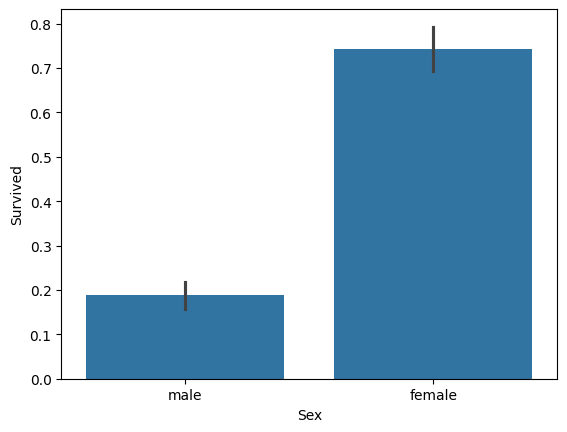

In [18]:
# 성별 생존 확률
sns.barplot(x='Sex',y='Survived', data=titanic_df)

<Axes: xlabel='Pclass', ylabel='Survived'>

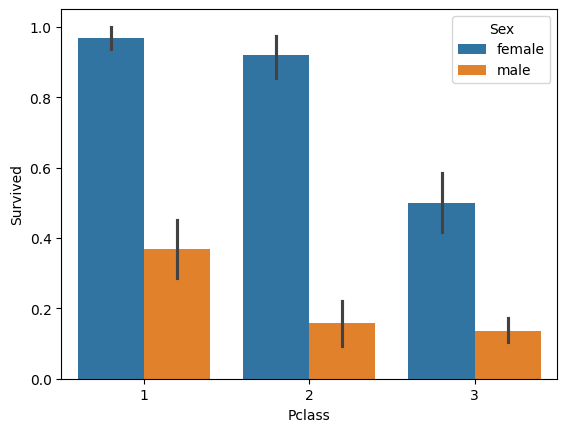

In [19]:
# 객실 등급 별 (성별 간) 생존 확률
sns.barplot(x='Pclass',y='Survived', hue='Sex', data=titanic_df)

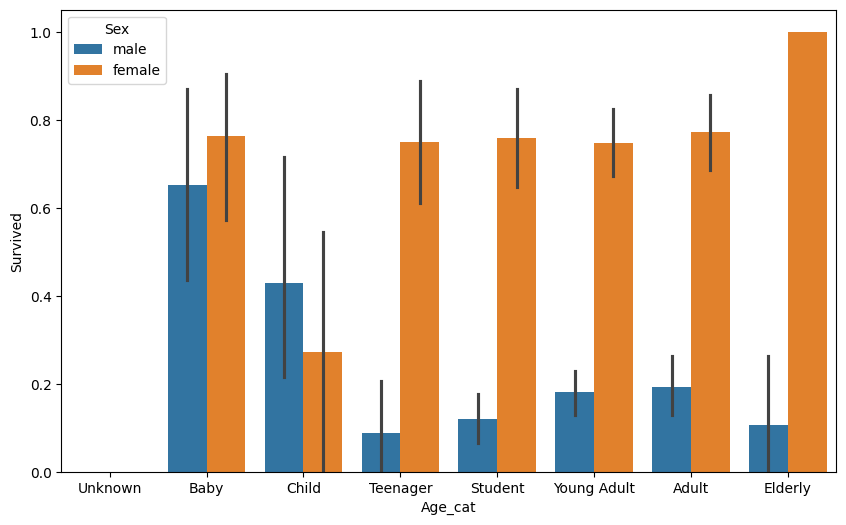

In [20]:
# 입력 Age에 따라 구분 값을 반환하는 함수 설정. applt lambda 식을 사용
def get_category(age):
  cat = ''
  if age <= -1: cat='Unknown'
  elif age <= 5: cat='Baby'
  elif age <= 12: cat= 'Child'
  elif age <=18: cat='Teenager'
  elif age <= 25: cat='Student'
  elif age <= 35: cat='Young Adult'
  elif age <= 60: cat='Adult'
  else: cat='Elderly'

  return cat

# 막대그래프 크기 설정
plt.figure(figsize=(10,6))

# x축의 값을 순차적으로 표시 위해 설정
group_names = ['Unknown','Baby','Child','Teenager','Student','Young Adult','Adult','Elderly']

# lambda 식에 위에서 생성한 get_category() 함수를 반환값으로
titanic_df['Age_cat'] = titanic_df['Age'].apply(lambda x: get_category(x))
sns.barplot(x='Age_cat',y='Survived', hue='Sex', data=titanic_df, order=group_names)
titanic_df.drop('Age_cat',axis=1, inplace=True)

In [21]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

# 문자열-> 숫자형 카테고리 피처로 전환
def encode_features(dataDF):
  features= ['Cabin','Sex','Embarked']
  for feature in features:
    le = LabelEncoder()
    le = le.fit(dataDF[feature])
    dataDF[feature] = le.transform(dataDF[feature])

  return dataDF

titanic_df = encode_features(titanic_df)
titanic_df.head() # Sex, Cabin, Embarked 속성이 숫자형으로 바뀜

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,7,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,7,3


In [22]:
# Null 처리 함수 생성
def fillna(df):
  df['Age'].fillna(df['Age'].mean(), inplace=True)
  df['Cabin'].fillna('N', inplace = True)
  df['Embarked'].fillna('N', inplace=True)
  df['Fare'].fillna(0, inplace=True)
  return df

# 머신러닝 알고리즘에 불필요한 피처 제거
def drop_features(df):
  df.drop(['PassengerId', 'Name','Ticket'], axis=1, inplace=True)
  return df

# 레이블 인코딩 수행
def format_features(df):
  df['Cabin']=df['Cabin'].str[:1]
  features = ['Cabin','Sex','Embarked']
  for feature in features:
    le = LabelEncoder()
    le = le.fit(df[feature])
    df[feature]=le.transform(df[feature])
  return df

# 앞의 전처리 함수 호출
def transform_features(df):
  df=fillna(df)
  df=drop_features(df)
  df=format_features(df)
  return df

In [23]:
# 원본 데이터 재로딩, 피처 데이터 세트와 레이블 데이터 세트 추출
titanic_df = pd.read_csv('/content/drive/MyDrive/ESAA/과제/titanic_train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived', axis=1)

X_titanic_df = transform_features(X_titanic_df)

In [24]:
# 테스트 세트 추출
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, test_size=0.2, random_state=11)

In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 결정트리, Random Forest, 로지스틱 회귀 각각의 사이킷런 Classifier 클래스 생성
dt_clf = DecisionTreeClassifier(random_state=11)
rf_clf = RandomForestClassifier(random_state=11)
lr_clf = LogisticRegression(solver='liblinear') # 최적화 알고리즘을 liblinear로 설정, 작은 데이터 세트에서 성능 좋음

# DecisionTreeClassifier 학습/예측/평가
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)
print('DecisionTreeClassifier 정확도: {0:.4f}'.format(accuracy_score(y_test, dt_pred)))

# RandomForestClassifier 학습/예측/평가
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
print('RandomForestClassifier 정확도:{0:.4f}'.format(accuracy_score(y_test, rf_pred)))

# LogisticRegression 학습/예측/평가
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
print('LogisticRegression 정확도:{0:.4f}'.format(accuracy_score(y_test, rf_pred)))


DecisionTreeClassifier 정확도: 0.7877
RandomForestClassifier 정확도:0.8547
LogisticRegression 정확도:0.8547


In [29]:
# 교차검증으로 결정트리 모델 평가
from sklearn.model_selection import KFold

def exec_kfold(clf, folds=5):
  # 폴드 세트를 5개인 KFold 객체를 생성, 폴드 수만큼 예측결과 저장을 위한 리스트 객체 생성.
  kfold = KFold(n_splits=folds)
  scores=[]

  # KFold 교차 검증 수행
  for iter_count, (train_index, test_index) in enumerate(kfold.split(X_titanic_df)):
    # X_titanic_df 데이터에서 교차 검증별로 학습과 검증 데이터를 가리키는 index 생성
    X_train, X_test = X_titanic_df.values[train_index], X_titanic_df.values[test_index]
    y_train, y_test = y_titanic_df.values[train_index], y_titanic_df.values[test_index]
    # Classifier 학습, 예측, 정확도 계산
    clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    scores.append(accuracy)
    print("교차 검증 {0} 정확도: {1:.4f}".format(iter_count, accuracy))

  # 5개 폴드에서의 평균 정확도 계산.
  mean_score = np.mean(scores)
  print("평균 정확도: {0:4f}".format(mean_score))
# exec_kfold 호출
exec_kfold(dt_clf, folds=5)

교차 검증 0 정확도: 0.7542
교차 검증 1 정확도: 0.7809
교차 검증 2 정확도: 0.7865
교차 검증 3 정확도: 0.7697
교차 검증 4 정확도: 0.8202
평균 정확도: 0.782299


In [31]:
# cross_val_score() API로 교차검증 수행
from sklearn.model_selection import cross_val_score
scores = cross_val_score(dt_clf, X_titanic_df, y_titanic_df, cv=5)
for iter_count, accuracy in enumerate(scores):
  print("교차 검증 {0} 정확도: {1:.4f}".format(iter_count, accuracy))

print("평균 정확도: {0:4f}".format(np.mean(scores)))

교차 검증 0 정확도: 0.7430
교차 검증 1 정확도: 0.7753
교차 검증 2 정확도: 0.7921
교차 검증 3 정확도: 0.7865
교차 검증 4 정확도: 0.8427
평균 정확도: 0.787929


In [33]:
# GridSearchCV로 최적의 파라미터 찾고 예측 성능 측정
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth':[2,3,5,10], 'min_samples_split':[2,3,5], 'min_samples_leaf':[1,5,8]}

grid_dclf = GridSearchCV(dt_clf, param_grid = parameters, scoring='accuracy', cv=5)
grid_dclf.fit(X_train, y_train)

print('GridSearchCV 최적 하이퍼 파라미터:', grid_dclf.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_dclf.best_score_))
best_dclf = grid_dclf.best_estimator_

# GridSearchCV의 최적 하이퍼 파라미터로 학습된 Estimator로 예측 및 평가 수행.
dpredictions = best_dclf.predict(X_test)
accuracy = accuracy_score(y_test, dpredictions)
print('테스트 세트에서의 DecisionTreeClasifier 정확도: {0:.4f}'.format(accuracy))

GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}
GridSearchCV 최고 정확도: 0.7992
테스트 세트에서의 DecisionTreeClasifier 정확도: 0.8715
